In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
#pip install hdbscan
import hdbscan


ModuleNotFoundError: No module named 'hdbscan'

In [2]:
# 2. Carregando a base
df = pd.read_excel("base_sintetica_dividas.xlsx")
df.head()

,idade,renda_mensal,valor_original_divida,dias_em_atraso,parcelas_em_aberto,escolaridade,estado_civil,localizacao,valor_atualizado_divida
0,56,1721.419851,5777.880011,353,9,medio,solteiro,BA,6457.74
1,69,3713.048416,4706.787595,266,32,superior,solteiro,PR,5124.12
2,46,3948.681325,5199.287281,421,5,pos-graduacao,casado,BA,5928.92
3,32,2288.732737,6543.393583,270,3,medio,casado,BA,7132.30
4,60,1842.342064,3700.067418,395,17,medio,divorciado,RS,4187.24


In [3]:
# 3. Verificando info geral
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    10000 non-null  int64  
 1   renda_mensal             10000 non-null  float64
 2   valor_original_divida    10000 non-null  float64
 3   dias_em_atraso           10000 non-null  int64  
 4   parcelas_em_aberto       10000 non-null  int64  
 5   escolaridade             10000 non-null  object 
 6   estado_civil             10000 non-null  object 
 7   localizacao              10000 non-null  object 
 8   valor_atualizado_divida  10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.3+ KB
None
               idade  renda_mensal  valor_original_divida  dias_em_atraso  \
count   10000.000000  10000.000000           10000.000000     10000.00000   
unique           NaN           NaN                    NaN             NaN   

In [4]:
# 4. Pré-processamento
cat_cols = ['escolaridade', 'estado_civil', 'localizacao']
num_cols = ['idade', 'renda_mensal', 'valor_original_divida', 'valor_atualizado_divida',
            'dias_em_atraso', 'parcelas_em_aberto']

In [6]:
# One-hot encoding para variáveis categóricas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,idade,renda_mensal,valor_original_divida,dias_em_atraso,parcelas_em_aberto,valor_atualizado_divida,escolaridade_medio,escolaridade_pos-graduacao,escolaridade_superior,estado_civil_divorciado,estado_civil_solteiro,estado_civil_viuvo,localizacao_CE,localizacao_MG,localizacao_PE,localizacao_PR,localizacao_RJ,localizacao_RS,localizacao_SP
0,56,1721.419851,5777.880011,353,9,6457.74,True,False,False,False,True,False,False,False,False,False,False,False,False
1,69,3713.048416,4706.787595,266,32,5124.12,False,False,True,False,True,False,False,False,False,True,False,False,False
2,46,3948.681325,5199.287281,421,5,5928.92,False,True,False,False,False,False,False,False,False,False,False,False,False
3,32,2288.732737,6543.393583,270,3,7132.30,True,False,False,False,False,False,False,False,False,False,False,False,False
4,60,1842.342064,3700.067418,395,17,4187.24,True,False,False,True,False,False,False,False,False,False,False,True,False


In [7]:
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded[num_cols + list(df_encoded.columns.difference(num_cols))])

In [10]:
# 5. Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
# 6. K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, df['cluster_kmeans'])

c:\Users\frederico.antonio\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\frederico.antonio\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\frederico.antonio\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\frederico.antonio\AppData\Loc

In [16]:
# 7. HDBSCAN clustering
hdb = hdbscan.HDBSCAN(min_cluster_size=200)
df['cluster_hdbscan'] = hdb.fit_predict(X_scaled)
silhouette_hdb = silhouette_score(X_scaled, df['cluster_hdbscan'][df['cluster_hdbscan'] != -1])  # -1 são outliers

NameError: name 'hdbscan' is not defined

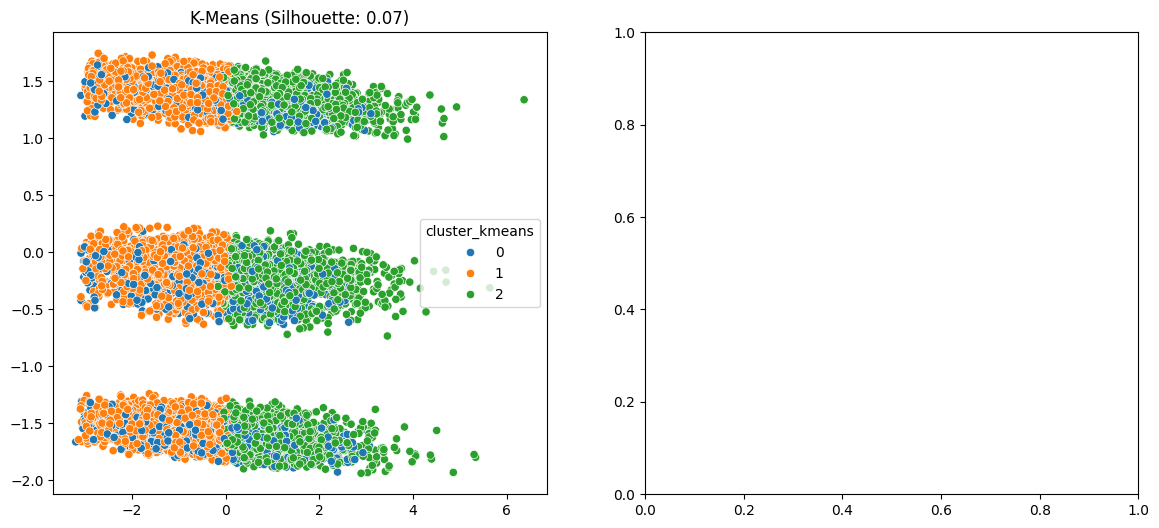

In [18]:
# 8. Visualização PCA + Clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_kmeans'], palette='tab10', ax=axes[0])
axes[0].set_title(f"K-Means (Silhouette: {silhouette_kmeans:.2f})")

#sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_hdbscan'], palette='Set2', ax=axes[1])
#axes[1].set_title(f"HDBSCAN (Silhouette: {silhouette_hdb:.2f})")
#plt.tight_layout()
plt.show()

In [19]:
# 9. Análise por cluster
cluster_summary = df.groupby('cluster_kmeans')[num_cols].mean().round(2)
print("Resumo médio por cluster (KMeans):")
print(cluster_summary)

Resumo médio por cluster (KMeans):
                idade  renda_mensal  valor_original_divida  \
cluster_kmeans                                               
0               43.60       3026.53                3918.81   
1               44.31       3022.01                2529.44   
2               42.68       3043.14                5660.59   

                valor_atualizado_divida  dias_em_atraso  parcelas_em_aberto  
cluster_kmeans                                                               
0                               4400.49          367.18               18.00  
1                               2822.81          354.05               17.92  
2                               6380.43          385.66               17.98  
